In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

In [2]:
os.chdir("C:\\Users\\user\\Desktop\\ML Files")

In [9]:
df = pd.read_csv('income_evaluation.csv')

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [22]:
num_atribute=['age' , ' fnlwgt' , ' education-num' , ' capital-gain', ' capital-loss',' hours-per-week']

cat_atribute=[' workclass' , ' education' , ' marital-status' , ' occupation' , ' relationship',' race',' sex',' native-country']

In [23]:
le = LabelEncoder()


In [24]:
df[' income']= le.fit_transform(df[' income'])

In [25]:
X= df.drop([' income'], axis=1)
y= df[' income']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [26]:
X_train[cat_atribute].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
16525,Self-emp-inc,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
14551,Private,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
518,?,Some-college,Never-married,?,Unmarried,White,Female,United-States
22524,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States
11425,Private,12th,Never-married,Handlers-cleaners,Own-child,White,Male,United-States


In [27]:
X_train[cat_atribute] = X_train[cat_atribute].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [28]:
X_train[cat_atribute].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
16525,5,10,2,10,0,4,1,38
14551,4,9,4,4,1,4,0,38
518,0,15,4,0,4,4,0,38
22524,4,15,2,1,0,4,1,38
11425,4,2,4,6,3,4,1,38


In [29]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atribute])

array([[ 0.39574269, -1.18011138,  2.29318429, -0.14783716, -0.21768425,
         1.57918014],
       [-1.21466862,  0.20188912,  1.12830357, -0.14783716, -0.21768425,
        -0.84195487],
       [-1.28786913,  0.1346865 , -0.03657715, -0.14783716, -0.21768425,
        -0.43843237],
       ...,
       [-0.84866605, -0.80501055,  1.12830357, -0.14783716, -0.21768425,
        -0.03490987],
       [ 1.49375039,  0.74194955, -0.42487072, -0.14783716, -0.21768425,
        -0.03490987],
       [-0.40946296, -1.2323759 ,  1.12830357, -0.14783716,  4.49422474,
         0.36861264]])

In [30]:
a = X_train[cat_atribute]
b = ss.transform(X_train[num_atribute])

Xtr = np.hstack([a,b])
Xtr.shape 

(22792, 14)

In [31]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [32]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atribute])
le = LabelEncoder()
X_test[cat_atribute] = X_test[cat_atribute].apply(le.fit_transform)
a1 = X_test[cat_atribute]
b1 = ss.transform(X_test[num_atribute])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(9769, 14)

In [33]:
y_pred = knn.predict(Xtr1)

In [34]:
confusion_matrix(y_test, y_pred)

array([[6777,  773],
       [ 916, 1303]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred)

0.8271061521138294

In [37]:
from sklearn.metrics import precision_recall_fscore_support

In [38]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.88093072, 0.62764933]),
 array([0.89761589, 0.58720144]),
 array([0.88919504, 0.60675204]),
 array([7550, 2219], dtype=int64))

In [39]:
from sklearn.metrics import precision_score

In [40]:
precision_score(y_test, y_pred)

0.6276493256262042

In [41]:
from sklearn.metrics import recall_score

In [42]:
recall_score(y_test, y_pred)

0.587201442091032

In [43]:
from sklearn.metrics import f1_score

In [44]:
f1_score(y_test, y_pred)

0.6067520372526194

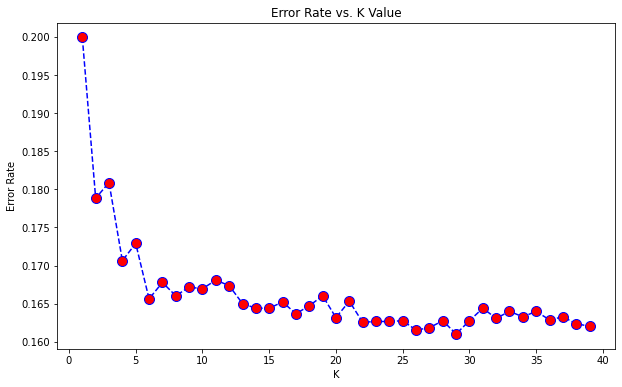

Minimum error:- 0.16101955164295223 at K = 29


In [45]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [46]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [47]:
y_pred = knn.predict(Xtr1)

In [48]:
accuracy_score(y_test, y_pred)

0.8328385709898659